In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime 
import matplotlib.pyplot as plt
import seaborn as sns
import math

import time

from datetime import date # Removed duplicate import of datetime
import calendar

import nltk
nltk.download() # Commented out, as it may prompt a download dialog

import string
import regex # Removed duplicate import of re
import re

from nltk.corpus import stopwords
from pprint import pprint

import spacy

import contractions

# Text to emotion 
import nltk
nltk.download('punkt') # Moved download to correct location

import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
import requests

from LeXmo import LeXmo

import tqdm
from tqdm import tqdm_notebook,tqdm

from pysummarization.nlpbase.auto_abstractor import AutoAbstractor
from pysummarization.tokenizabledoc.simple_tokenizer import SimpleTokenizer
from pysummarization.abstractabledoc.top_n_rank_abstractor import TopNRankAbstractor

import operator

# Increase display options for Pandas dataframes
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000
pd.options.display.max_colwidth = 10000
pd.options.display.max_seq_items = 2000


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package punkt to /Users/fuzzysha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# Read databases
df_news_true=pd.read_csv('data/DataSet_Misinfo_TRUE.csv',index_col=False)
df_news_fake=pd.read_csv('data/DataSet_Misinfo_FAKE.csv')
df_news_rpsub=pd.read_csv('data/EXTRA_RussianPropagandaSubset.csv')

In [4]:
df_news_fake=df_news_fake.iloc[:800,:]

In [5]:
# Separate each paragraph into sentences using nltk.sent_tokenize
df_sentences=pd.DataFrame(columns=['sent'])
list_token=[]
for para in tqdm(df_news_fake.text):
    if pd.isna(para)==False:
        tokens = nltk.sent_tokenize(para)
        list_token=list_token+tokens

# print the number of sentences        
print("we have {} sentences in the Text".format(len(list_token)))

# Print the number of unique sentences       
print("we have {} unique sentences in the Text".format(len(set(list_token))))

#convert the list of sentences into dataframe 
df_sentence =pd.DataFrame([set(list_token)]).T

# Rename the column 
df_sentence.columns=['sent']

# Print the first sentence
print ( "The first sentence is:")
print(df_sentence.loc[1,'sent'] )

100%|██████████| 800/800 [00:00<00:00, 3576.20it/s]


we have 12689 sentences in the Text
we have 12481 unique sentences in the Text
The first sentence is:
It s been a rough day in the Donald Trump White House.


In [6]:
df_sentence

,sent
0,"Jones said: We are so into the crazy now, when something significant happens, we don t notice."
1,It s been a rough day in the Donald Trump White House.
2,US News and World Report put this out today: The mere consideration of Trump changing the status quo sparked a renewed U.S. security warning on Tuesday.
3,Will they give them a warning?
4,That s not the way to do it.
...,...
12476,"They have all manner of reasons for why abortion should be illegal; from the misogynistic, religious and moral reasons all the way over to the misogynistic and outright bizarre ones."
12477,"Even Ted Cruz, though, who is one of the most extreme in Washington (and one of the most loathed) has withdrawn his support of Moore.One Republican, though, is holding on and he s shocked (I tell you) that anyone would ever call him an extremist over it.Rob Maness, who has the endorsement of Sarah Palin, Rand Paul, Rick Perry and Ben Carson, is running for the Louisiana State House."
12478,That never happened.
12479,"His first thing to do after the Civil War was to bring the Union back together, so we could become a more unified country."


In [7]:
# Add columns for each emotion to the df_sentence DataFrame
df_sentence['anger']=0
df_sentence['anticipation']=0
df_sentence['disgust']=0
df_sentence['fear']=0
df_sentence['joy']=0
df_sentence['negative']=0
df_sentence['positive']=0
df_sentence['sadness']=0
df_sentence['surprise']=0
df_sentence['trust']=0

# Fix contractions like "I'm" to "I am"
df_sentence['sent_cont_fixed']=''
for i,row in df_sentence.iterrows():
    # Use a try-except block to handle errors for non-English sentences
    try:
        df_sentence.loc[i,'sent_cont_fixed']=contractions.fix(row.sent)
    
    # If an error is caught, print the index and row for reference
    except:
        exit()
    
# keep a copy of df_sentence
df_sentence_new=df_sentence.copy()

In [ ]:
# for each sentence, calculate the the related emotions and fill the values 
for i,row in tqdm_notebook(df_sentence_new.iterrows()):
    emo=(LeXmo.LeXmo(row.sent_cont_fixed))
    emo.pop('text', None)
    for key,value in emo.items():
        df_sentence_new.loc[i,key]=round(value,3)  


In [17]:
df_sentence_new_=df_sentence_new.iloc[:1000,:]

In [18]:
#save the database with the emotion for each sentence
df_sentence_new.to_hdf('data/df_news_fake_emotions.h5', key='df_news_fake_emotions')

In [19]:
df_freq_by_emotion={}

df_freq_by_emotion['anger']=len(df_sentence_new_[df_sentence_new_['anger']>0])
df_freq_by_emotion['anticipation']=len(df_sentence_new_[df_sentence_new_['anticipation']>0])
df_freq_by_emotion['disgust']=len(df_sentence_new_[df_sentence_new_['disgust']>0])
df_freq_by_emotion['fear']=len(df_sentence_new_[df_sentence_new_['fear']>0])
df_freq_by_emotion['joy']=len(df_sentence_new_[df_sentence_new_['joy']>0])
df_freq_by_emotion['negative']=len(df_sentence_new_[df_sentence_new_['negative']>0])
df_freq_by_emotion['positive']=len(df_sentence_new_[df_sentence_new_['positive']>0])
df_freq_by_emotion['sadness']=len(df_sentence_new_[df_sentence_new_['sadness']>0])
df_freq_by_emotion['surprise']=len(df_sentence_new_[df_sentence_new_['surprise']>0])
df_freq_by_emotion['trust']=len(df_sentence_new_[df_sentence_new_['trust']>0])


df_freq_by_emotion=pd.DataFrame.from_dict(df_freq_by_emotion,orient='index').reset_index()

df_freq_by_emotion.columns=['emotion','emotion_freq']

df_freq_by_emotion.sort_values('emotion_freq', ascending=False)

,emotion,emotion_freq
6,positive,589
5,negative,509
9,trust,509
8,surprise,451
1,anticipation,434
3,fear,355
0,anger,340
7,sadness,294
4,joy,289
2,disgust,210


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[(0.0, 910.0),
 Text(4.444444444444445, 0.5, ''),
 Text(0.5, 25.078125, 'Faculties | Continuing students')]

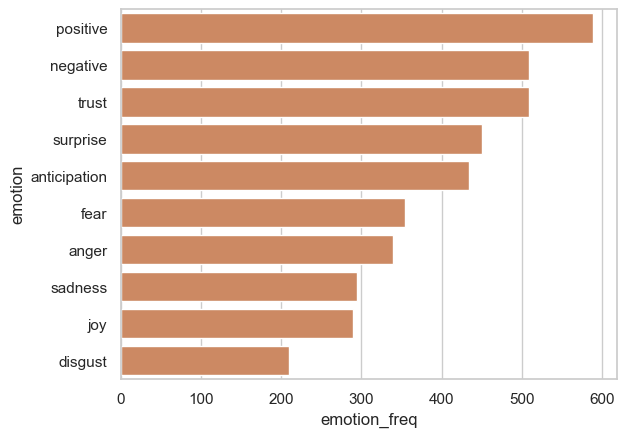

In [21]:
sns.set_theme(style="whitegrid")
pal=sns.color_palette("rocket_r", as_cmap=True)
sns.barplot(data=df_freq_by_emotion, 
            y=df_freq_by_emotion.emotion,
            x=df_freq_by_emotion.emotion_freq,
            order=df_freq_by_emotion.sort_values('emotion_freq', ascending=False).emotion,
            color='C1'
           
           
           )
# # Initialize the matplotlib figure

ax.legend(ncol=1, loc="lower right", frameon=True, title='March prefered')
ax.set(xlim=(0, 910), ylabel="", xlabel="Faculties | Continuing students")


In [ ]:
print ('l')